In [ ]:
"""
Plot GFP data
author: Jiancheng Zeng
Date: Nov 27, 2023
"""

In [17]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from numpy import array

"""
Select all the directories that contains data files
----------------------
"""
filenames = ["./d20220809/h20220809_0900.dat", "./d20220809/h20220809_1000.dat", "./d20220809/h20220809_1100.dat", "./d20220809/h20220809_1200.dat", "./d20220809/h20220809_1300.dat", "./d20220809/h20220809_1400.dat", "./d20220809/h20220809_1500.dat", "./d20220809/h20220809_1600.dat", "./d20220809/h20220809_1700.dat", "./d20220809/h20220809_1800.dat", "./d20220809/h20220809_1900.dat", "./d20220809/h20220809_2000.dat", "./d20220809/h20220809_2100.dat", "./d20220809/h20220809_2200.dat", "./d20220809/h20220809_2300.dat", "./d20220809/h20220810_0000.dat", "./d20220809/h20220810_0100.dat", "./d20220809/h20220810_0200.dat", "./d20220809/h20220810_0300.dat", "./d20220809/h20220810_0400.dat", "./d20220809/h20220810_0500.dat", "./d20220809/h20220810_0600.dat"]
"""
Read temperature data and combine them in one list, then save it to one txt file
----------------------
"""
data = []
for file in filenames:
    data.extend(array(np.genfromtxt(file, skip_header=1, skip_footer=0, names=None, dtype=float, usecols = list(range(25,73)), delimiter=',')))
    #print(data)
    #data = data.extend(data_list)
np.savetxt("read_data_20220809.txt", data, delimiter = " , ", fmt='%1.4g')
#print(type(data))  #check data type
print("finish reading data!")

"""
Read time and combine them in one list, then save it to one txt file
----------------------
"""
T = []
for file in filenames:
    T.extend(array(np.genfromtxt(file, skip_header=1, skip_footer=0, names=None, dtype=str, usecols = list(range(0,1)), delimiter=',')))
    #print(T)
    #data = data.extend(data_list)

#print(type(T)) #check time data type
np.savetxt("read_time_20220809.txt", T, delimiter = "\n", fmt = "%s")
print("finish reading time!")


finish reading data!
finish reading time!


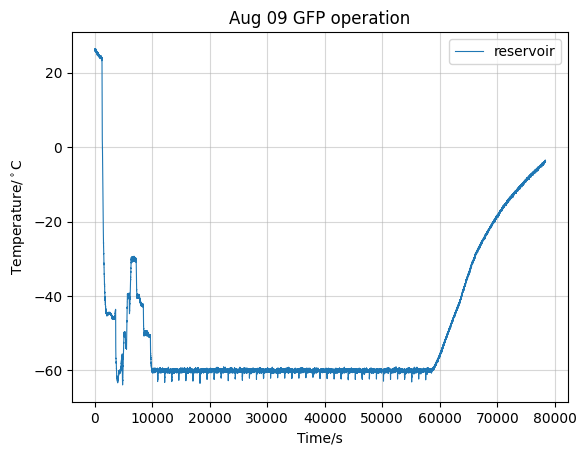

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from numpy import array

"""
Select which RTDs to plot and name them
---------------------
"""
RTDn = [1, 22, 7, 48] #single channel plot
RTDt = ['reservoir', 'Frame1', 'Frame2', 'Frame3']
#RTDn = list(range(1,39))  #plot RTD numbers
#RTDt = ["reservoir", "L1 Buttom", "L1 Middle", "L1 Top", "L6 Buttom", "L6 Middle", "L6 Top", "L12 Buttom", "L12 Middle", "L12 Top"]
#RTDt = ["reservoir", "Far Side Radiator(RTD13)", "Far Side Radiator(RTD14)", "Far Side Radiator(RTD15)", "Far Side Radiator(RTD16)", "Close Side Radiator(RTD28)", "Close Side R$

STDEV = []  #standard deviation
n=0
#C = ['black', 'springgreen', 'forestgreen', 'darkgreen', 'lightcoral', 'indianred', 'brown', 'royalblue', 'blue', 'navy']  #customize plot color
#W = [1, 0.5, 0.5, 0.5, 1, 1, 1, 1.5, 1.5, 1.5] #customize linewidth

"""
Read data from total data file
--------------------
"""
data = np.genfromtxt("./read_data_20220809.txt", skip_footer=0, skip_header=0, names=None, delimiter = " , ")    #get temperature data
T = np.genfromtxt("./read_time_20220809.txt", skip_footer=0, skip_header=0, names=None, delimiter = "\n")    #get time data


End = len(data[:,0])    #identify end time
StartTime = 0  #choose start time
EndTime = End  #choose end time
#print(EndTime)

"""
making plot and calculate standard deviation for equilibrium state
----------------------
"""
for i in RTDn:
    plt.plot(data[StartTime:57000, i-1],  label = RTDt[n], linewidth=0.8)
    #STDEV.append(statistics.stdev(data[10600:14600, i-1]))
    #print("stadard deviation for RTD",RTDn[n],RTDt[n]," is",STDEV[n],'degree C')
    n = n+1

plt.legend()
plt.xlabel("Time/s")
plt.ylabel("Temperature/$^\circ$C")
plt.title("Aug 09 GFP operation")
plt.grid(alpha=0.5)
